10 variant

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose as decompose
from statsmodels.tsa.stattools import adfuller

matplotlib.rcParams["figure.dpi"] = 800

df = pd.read_csv("data-1.csv")
df.head()

id        date  vaccines  tests  confirmed  recovered  deaths  hosp  vent  \
0  AFG  2020-01-01       0.0      0          0          0       0   0.0     0   
1  AFG  2020-01-02       0.0      0          0          0       0   0.0     0   
2  AFG  2020-01-03       0.0      0          0          0       0   0.0     0   
3  AFG  2020-01-04       0.0      0          0          0       0   0.0     0   
4  AFG  2020-01-05       0.0      0          0          0       0   0.0     0   

   icu  ...  currency  administrative_area_level  administrative_area_level_1  \
0    0  ...       AFN                          1                  Afghanistan   
1    0  ...       AFN                          1                  Afghanistan   
2    0  ...       AFN                          1                  Afghanistan   
3    0  ...       AFN                          1                  Afghanistan   
4    0  ...       AFN                          1                  Afghanistan   

   administrative_area_level_2  administrative_area_level_3  latitude  \
0                          NaN                          NaN      33.0   
1                          NaN                          NaN      33.0   
2                          NaN                          NaN      33.0   
3                          NaN                          NaN      33.0   
4                          NaN                          NaN      33.0   

   longitude  key  key_apple_mobility  key_google_mobility  
0       65.0  NaN                 NaN                   AF  
1       65.0  NaN                 NaN                   AF  
2       65.0  NaN                 NaN                   AF  
3       65.0  NaN                 NaN                   AF  
4       65.0  NaN                 NaN                   AF  

[5 rows x 36 columns]

In [2]:
df = df[df["id"] == "RUS"][["date", "recovered"]]
df

date  recovered
62320  2020-01-01          0
62321  2020-01-02          0
62322  2020-01-03          0
62323  2020-01-04          0
62324  2020-01-05          0
...           ...        ...
62725  2021-02-09    3455582
62726  2021-02-10    3477760
62727  2021-02-11    3499230
62728  2021-02-12    3519689
62729  2021-02-13    3519689

[410 rows x 2 columns]

In [3]:
ser = pd.Series(data=df["recovered"].values, index=df["date"], dtype=np.int32)
ser.index = pd.to_datetime(ser.index)
ser

date
2020-01-01          0
2020-01-02          0
2020-01-03          0
2020-01-04          0
2020-01-05          0
               ...   
2021-02-09    3455582
2021-02-10    3477760
2021-02-11    3499230
2021-02-12    3519689
2021-02-13    3519689
Length: 410, dtype: int32

<AxesSubplot:xlabel='date'>

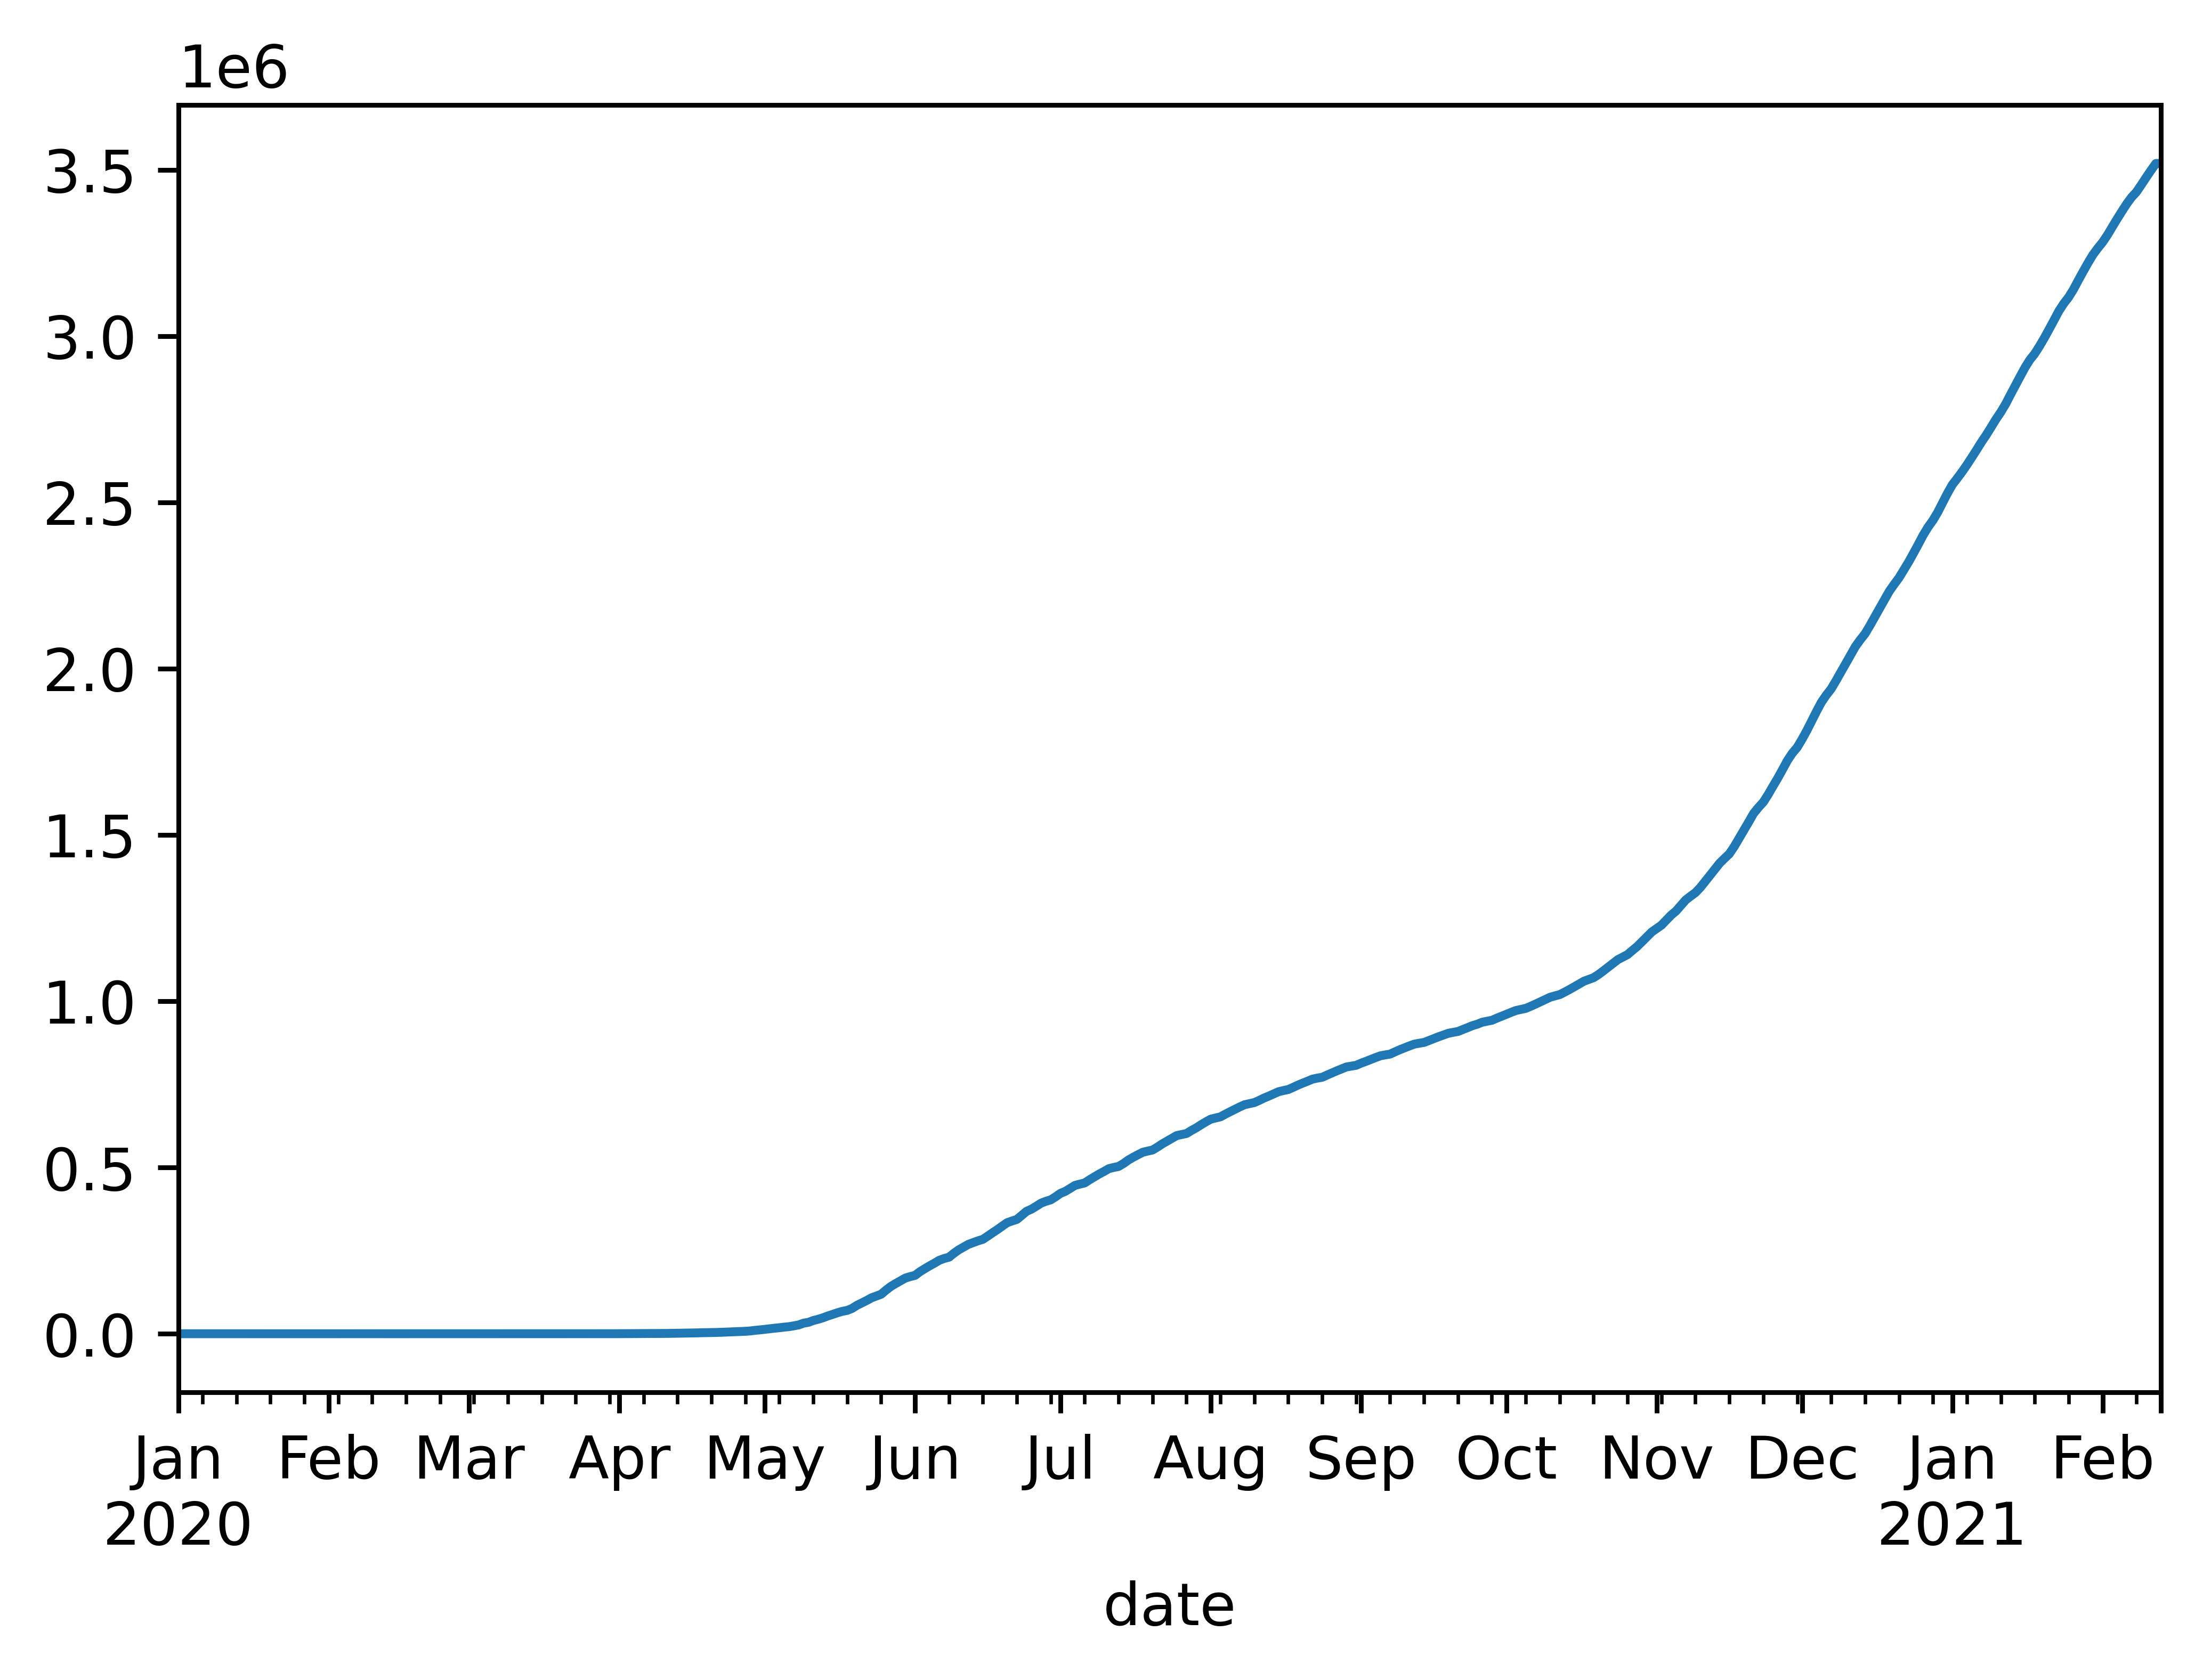

In [4]:
ser.plot()

<AxesSubplot:xlabel='date'>

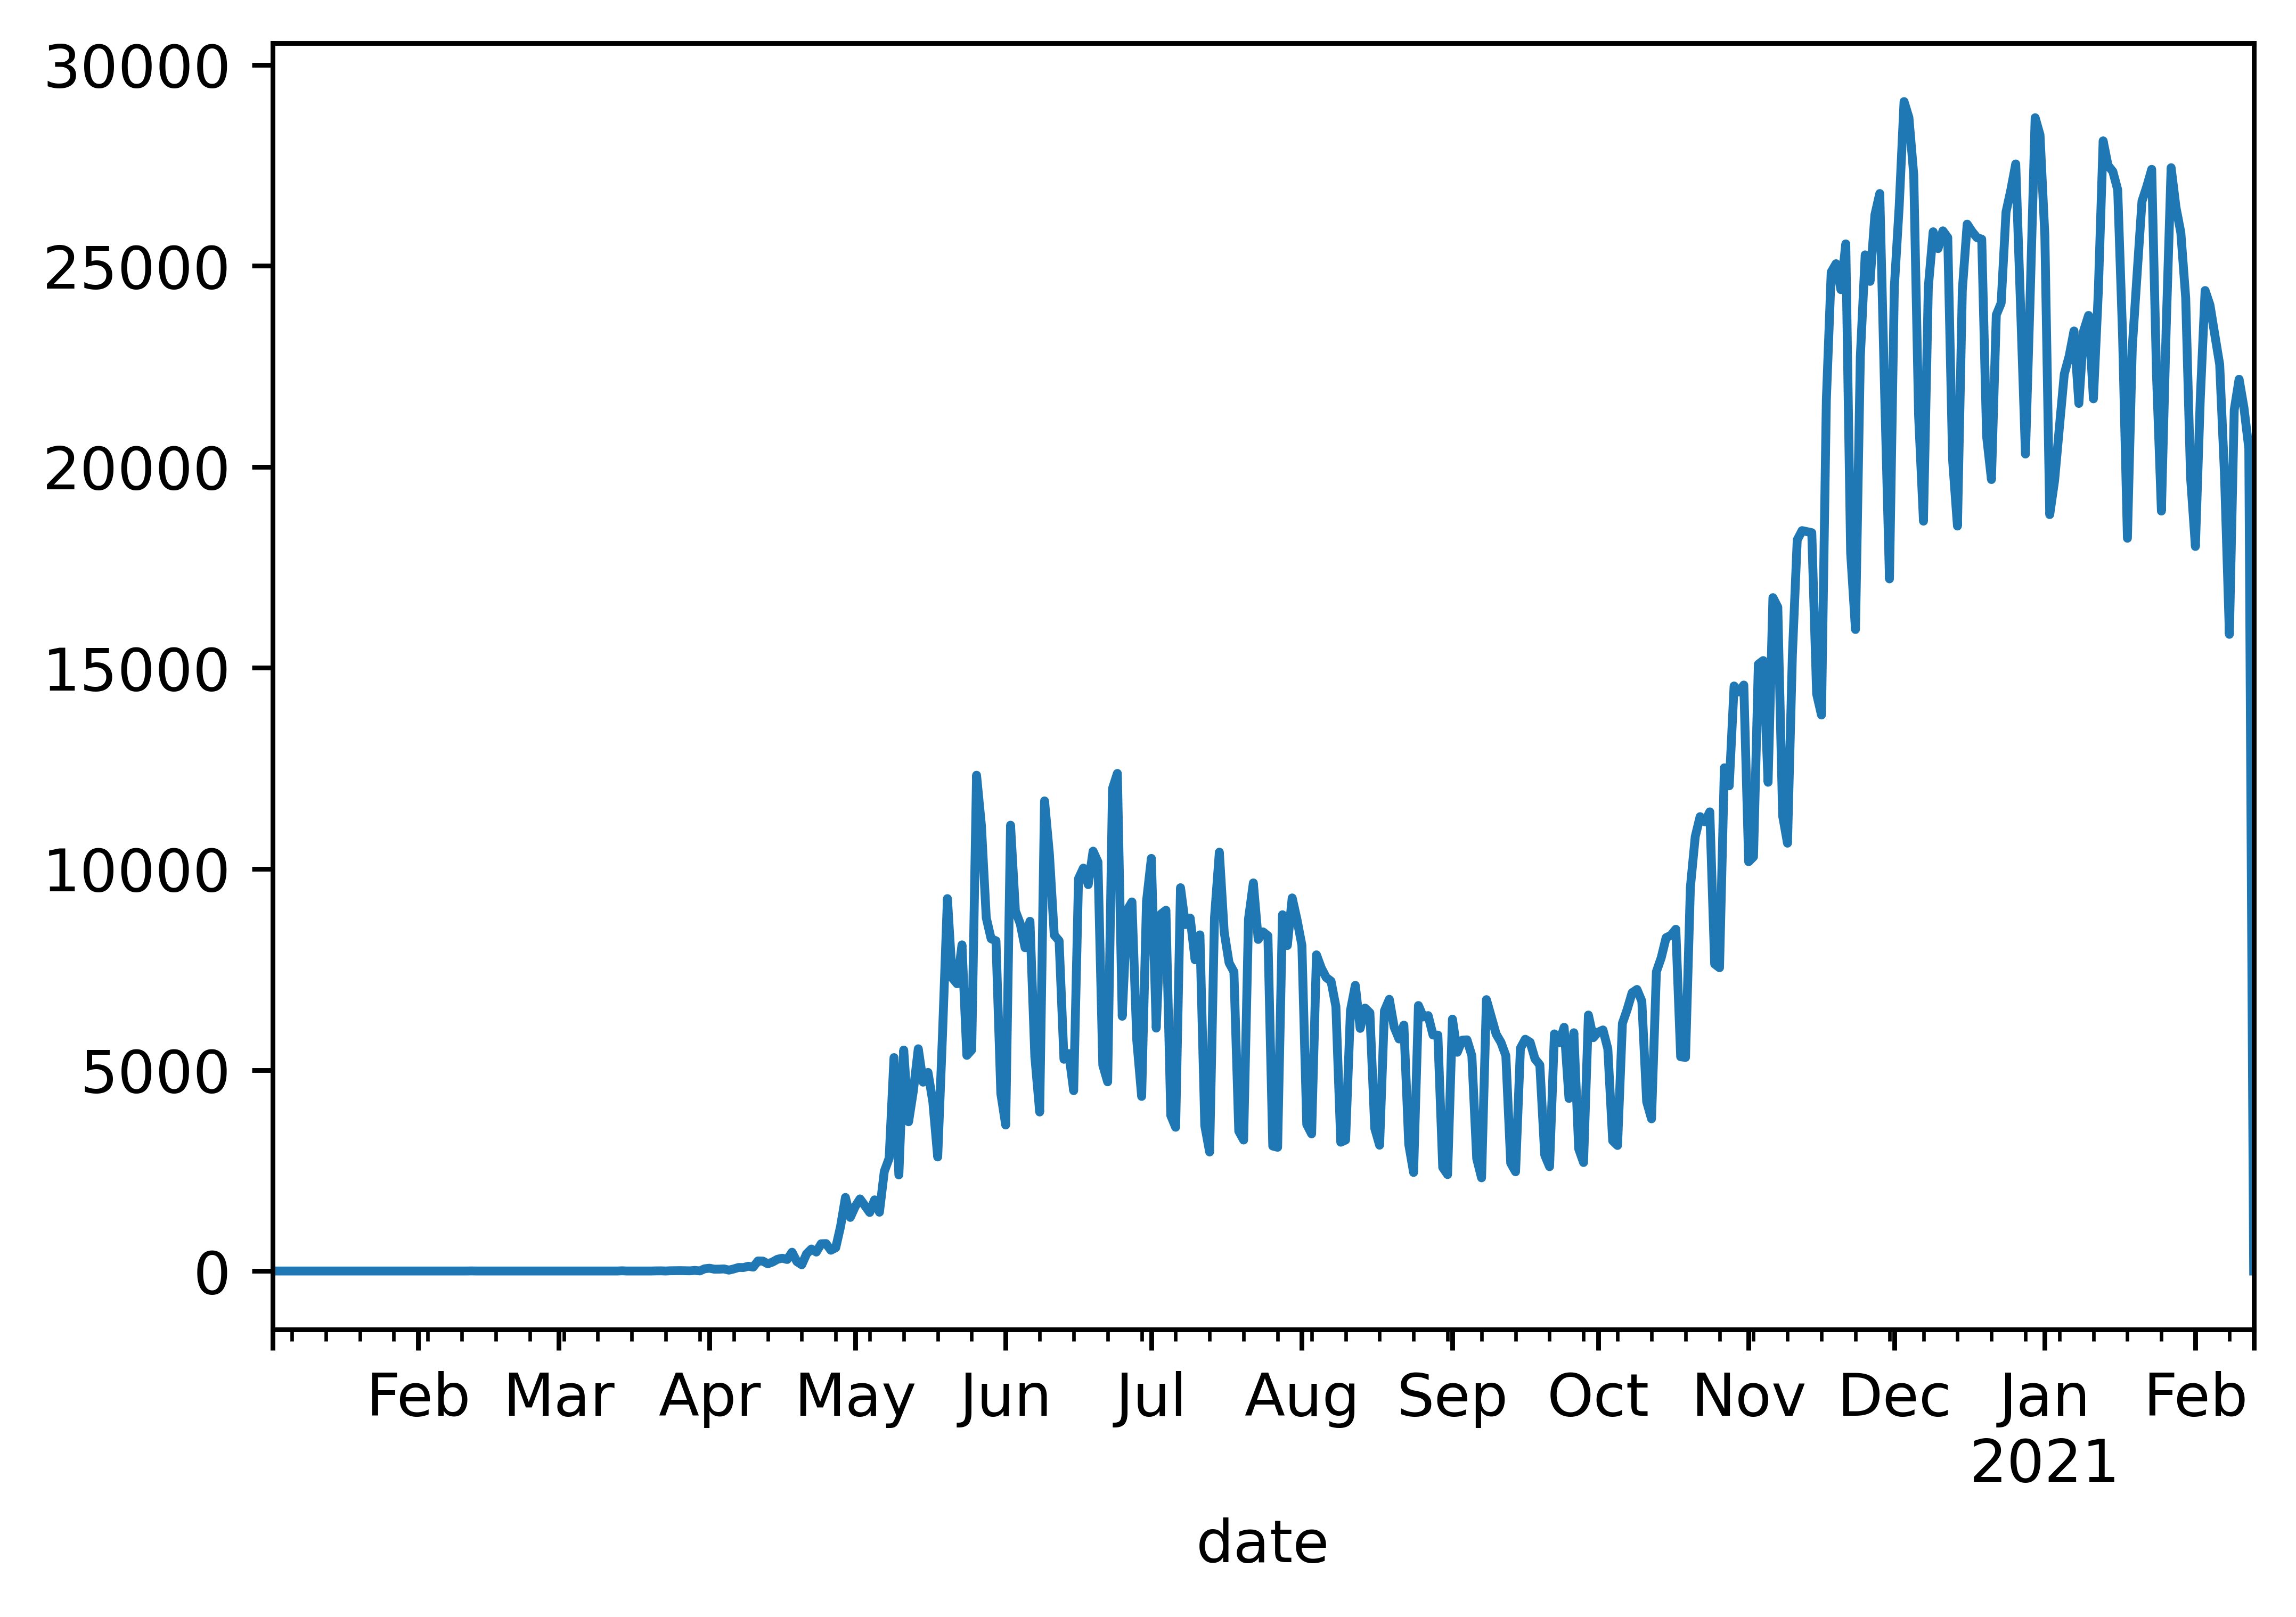

In [5]:
ser = ser.diff().iloc[1:]
ser.plot()


In [6]:
st1 = pd.Timestamp("2020-04-01")
end1 = pd.Timestamp("2020-08-30")
st2 = pd.Timestamp("2020-09-01")
s1 = ser[st1:end1]
s2 = ser[st2:].iloc[:-1]

confirm that series doesnt contain missing values

In [7]:
print(s1.isna().sum(), s2.isna().sum())

0 0


In [8]:
def decompose_and_show(ser, period=7):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex="all")
    fig.figsize = (12.0, 12.0)
    res = decompose(ser, model="multiplicative", period=period, extrapolate_trend=2)
    ax1.plot(res.observed.index, res.observed.values, c="b")
    ax1.set_title("observed")
    ax2.plot(res.trend.index, res.trend.values, c="r")
    ax2.set_title("trend")
    ax3.plot(res.seasonal.index, res.seasonal.values, c="g")
    ax3.set_title("seasonal")
    ax4.plot(res.resid.index, res.resid.values, c="orange")
    ax4.set_title("resid")
    ax1.grid(), ax2.grid(), ax3.grid(), ax4.grid()
    plt.tight_layout()
    plt.show()
    return res.resid

def decompose_and_show_daily(ser, period=7):
    fig, ax = plt.subplots()
    res = decompose(ser, model="multiplicative", period=period, extrapolate_trend=2).seasonal.iloc[:7]
    ax.set_title("seasonal_daily")
    ax.bar(res.index.dayofweek + 1, res.values, color="g")
    plt.show()


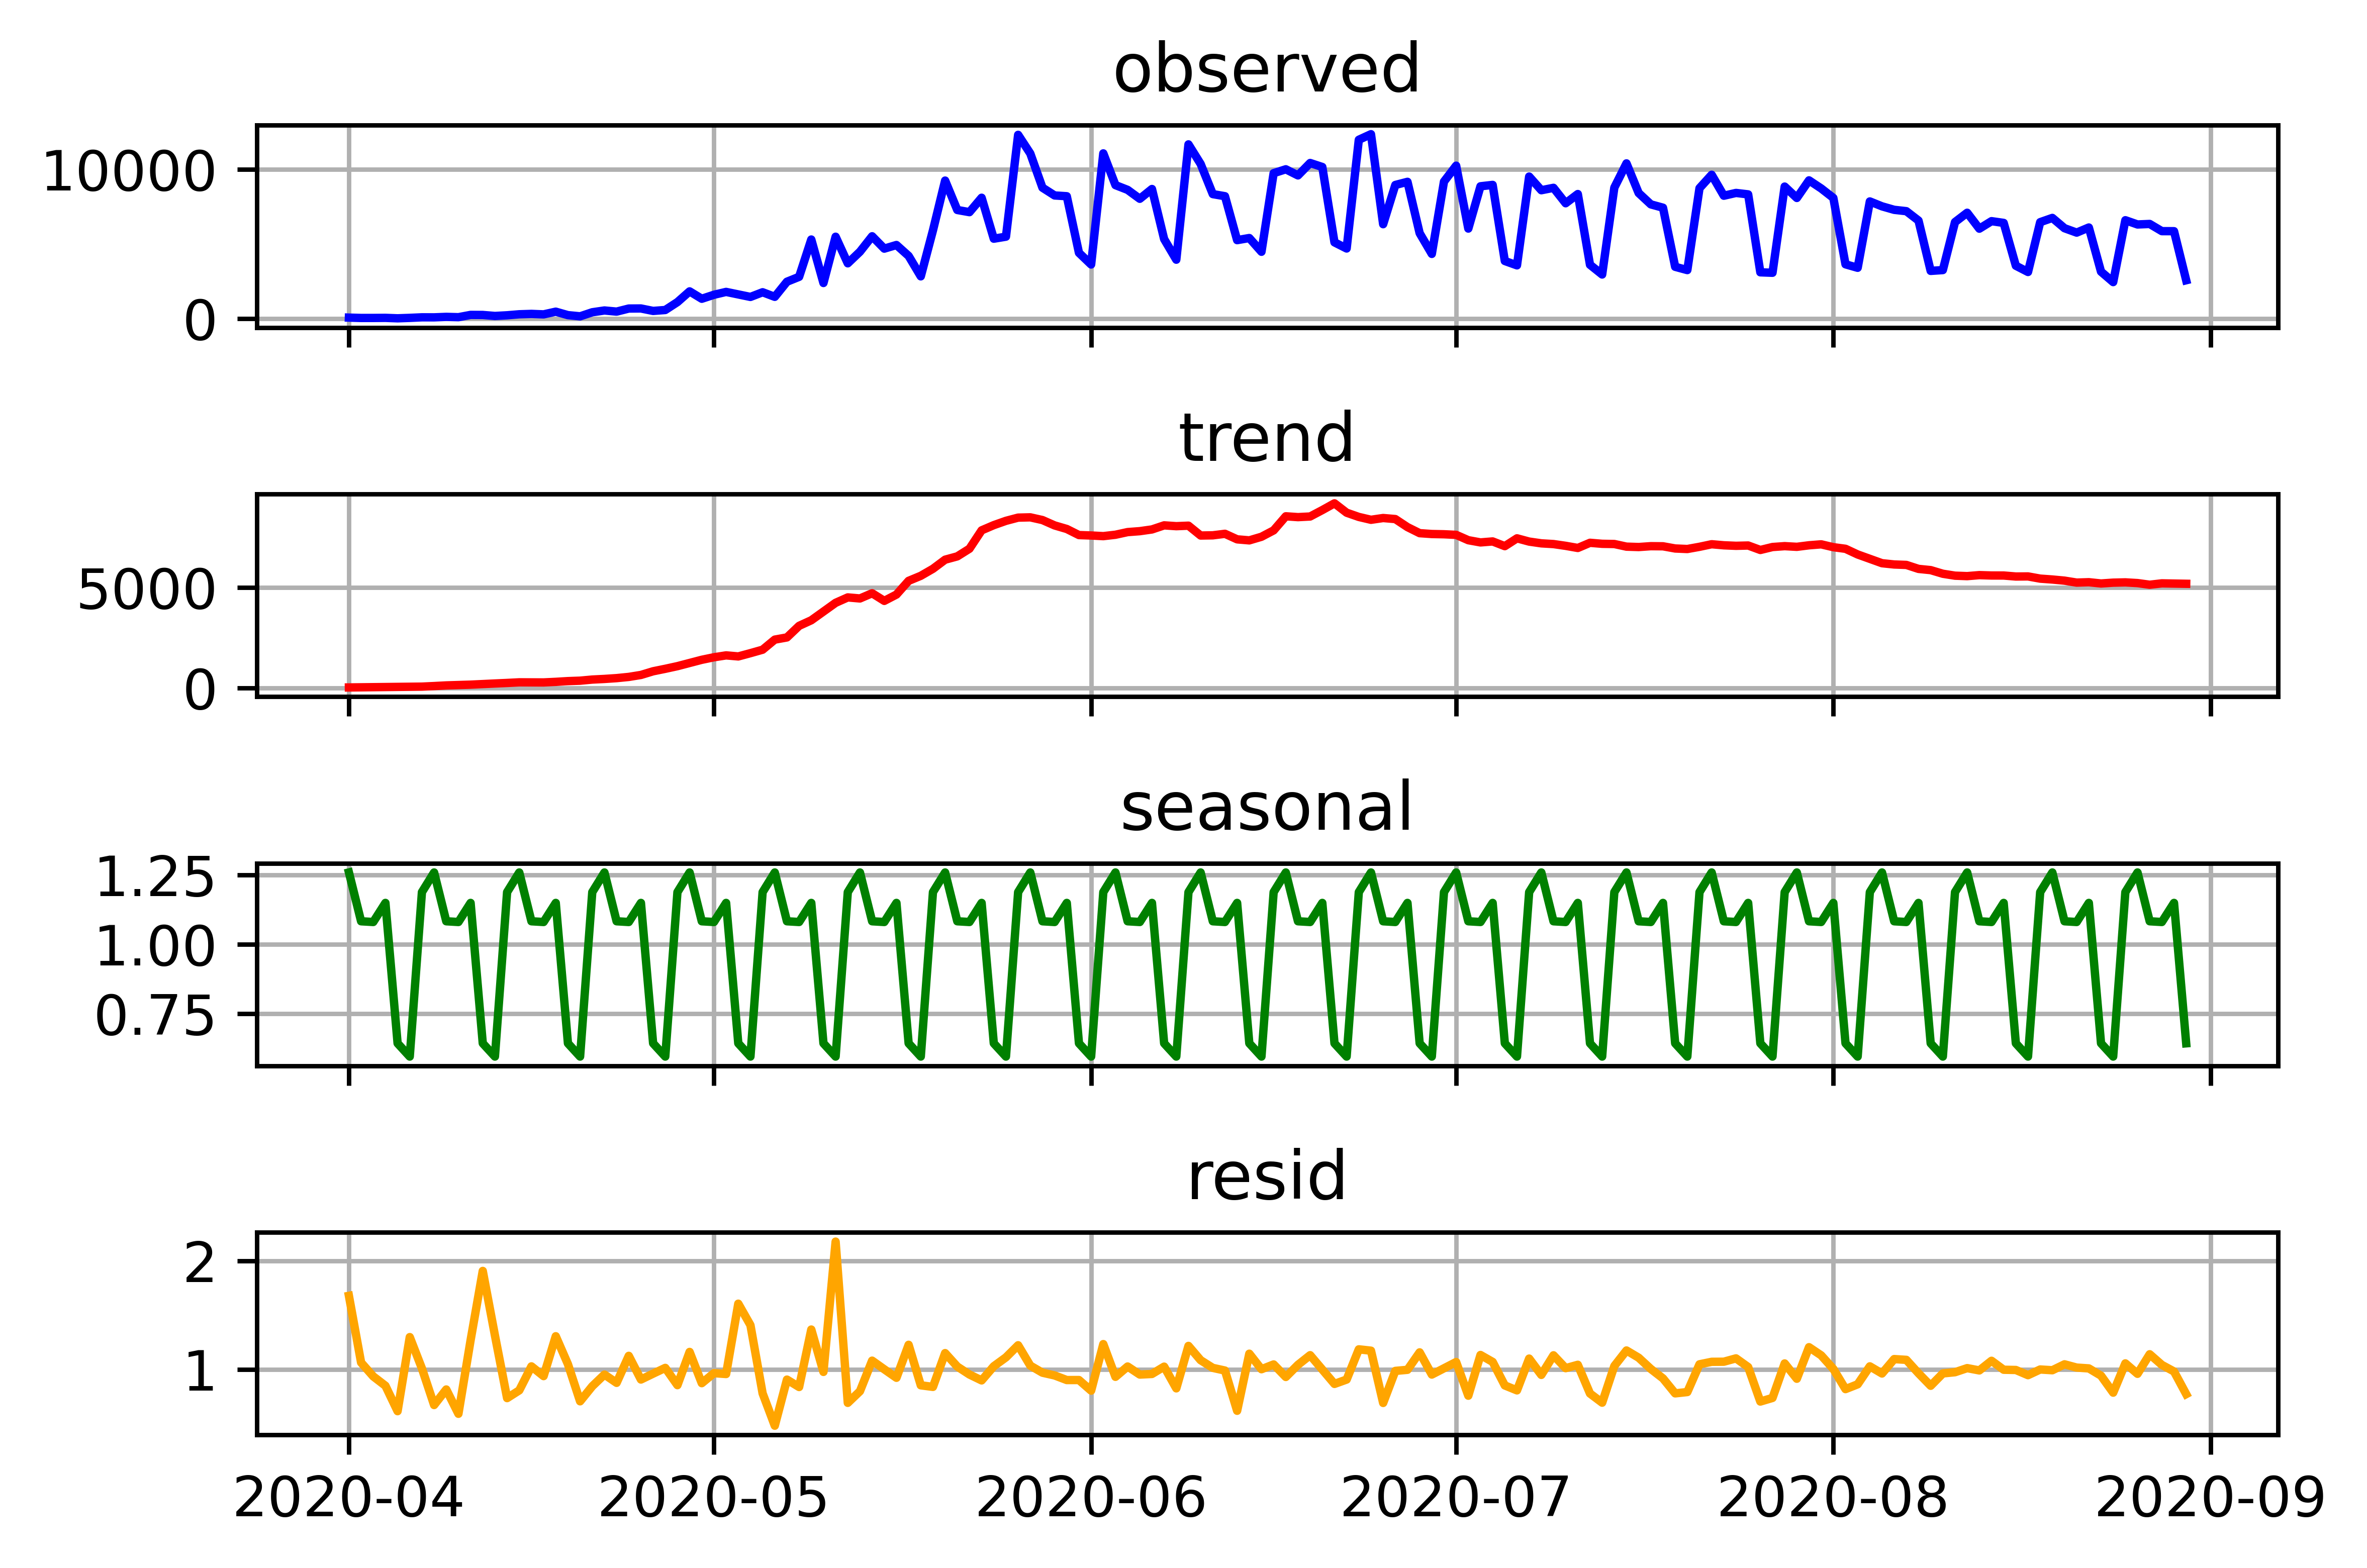

In [9]:
resid1 = decompose_and_show(s1)

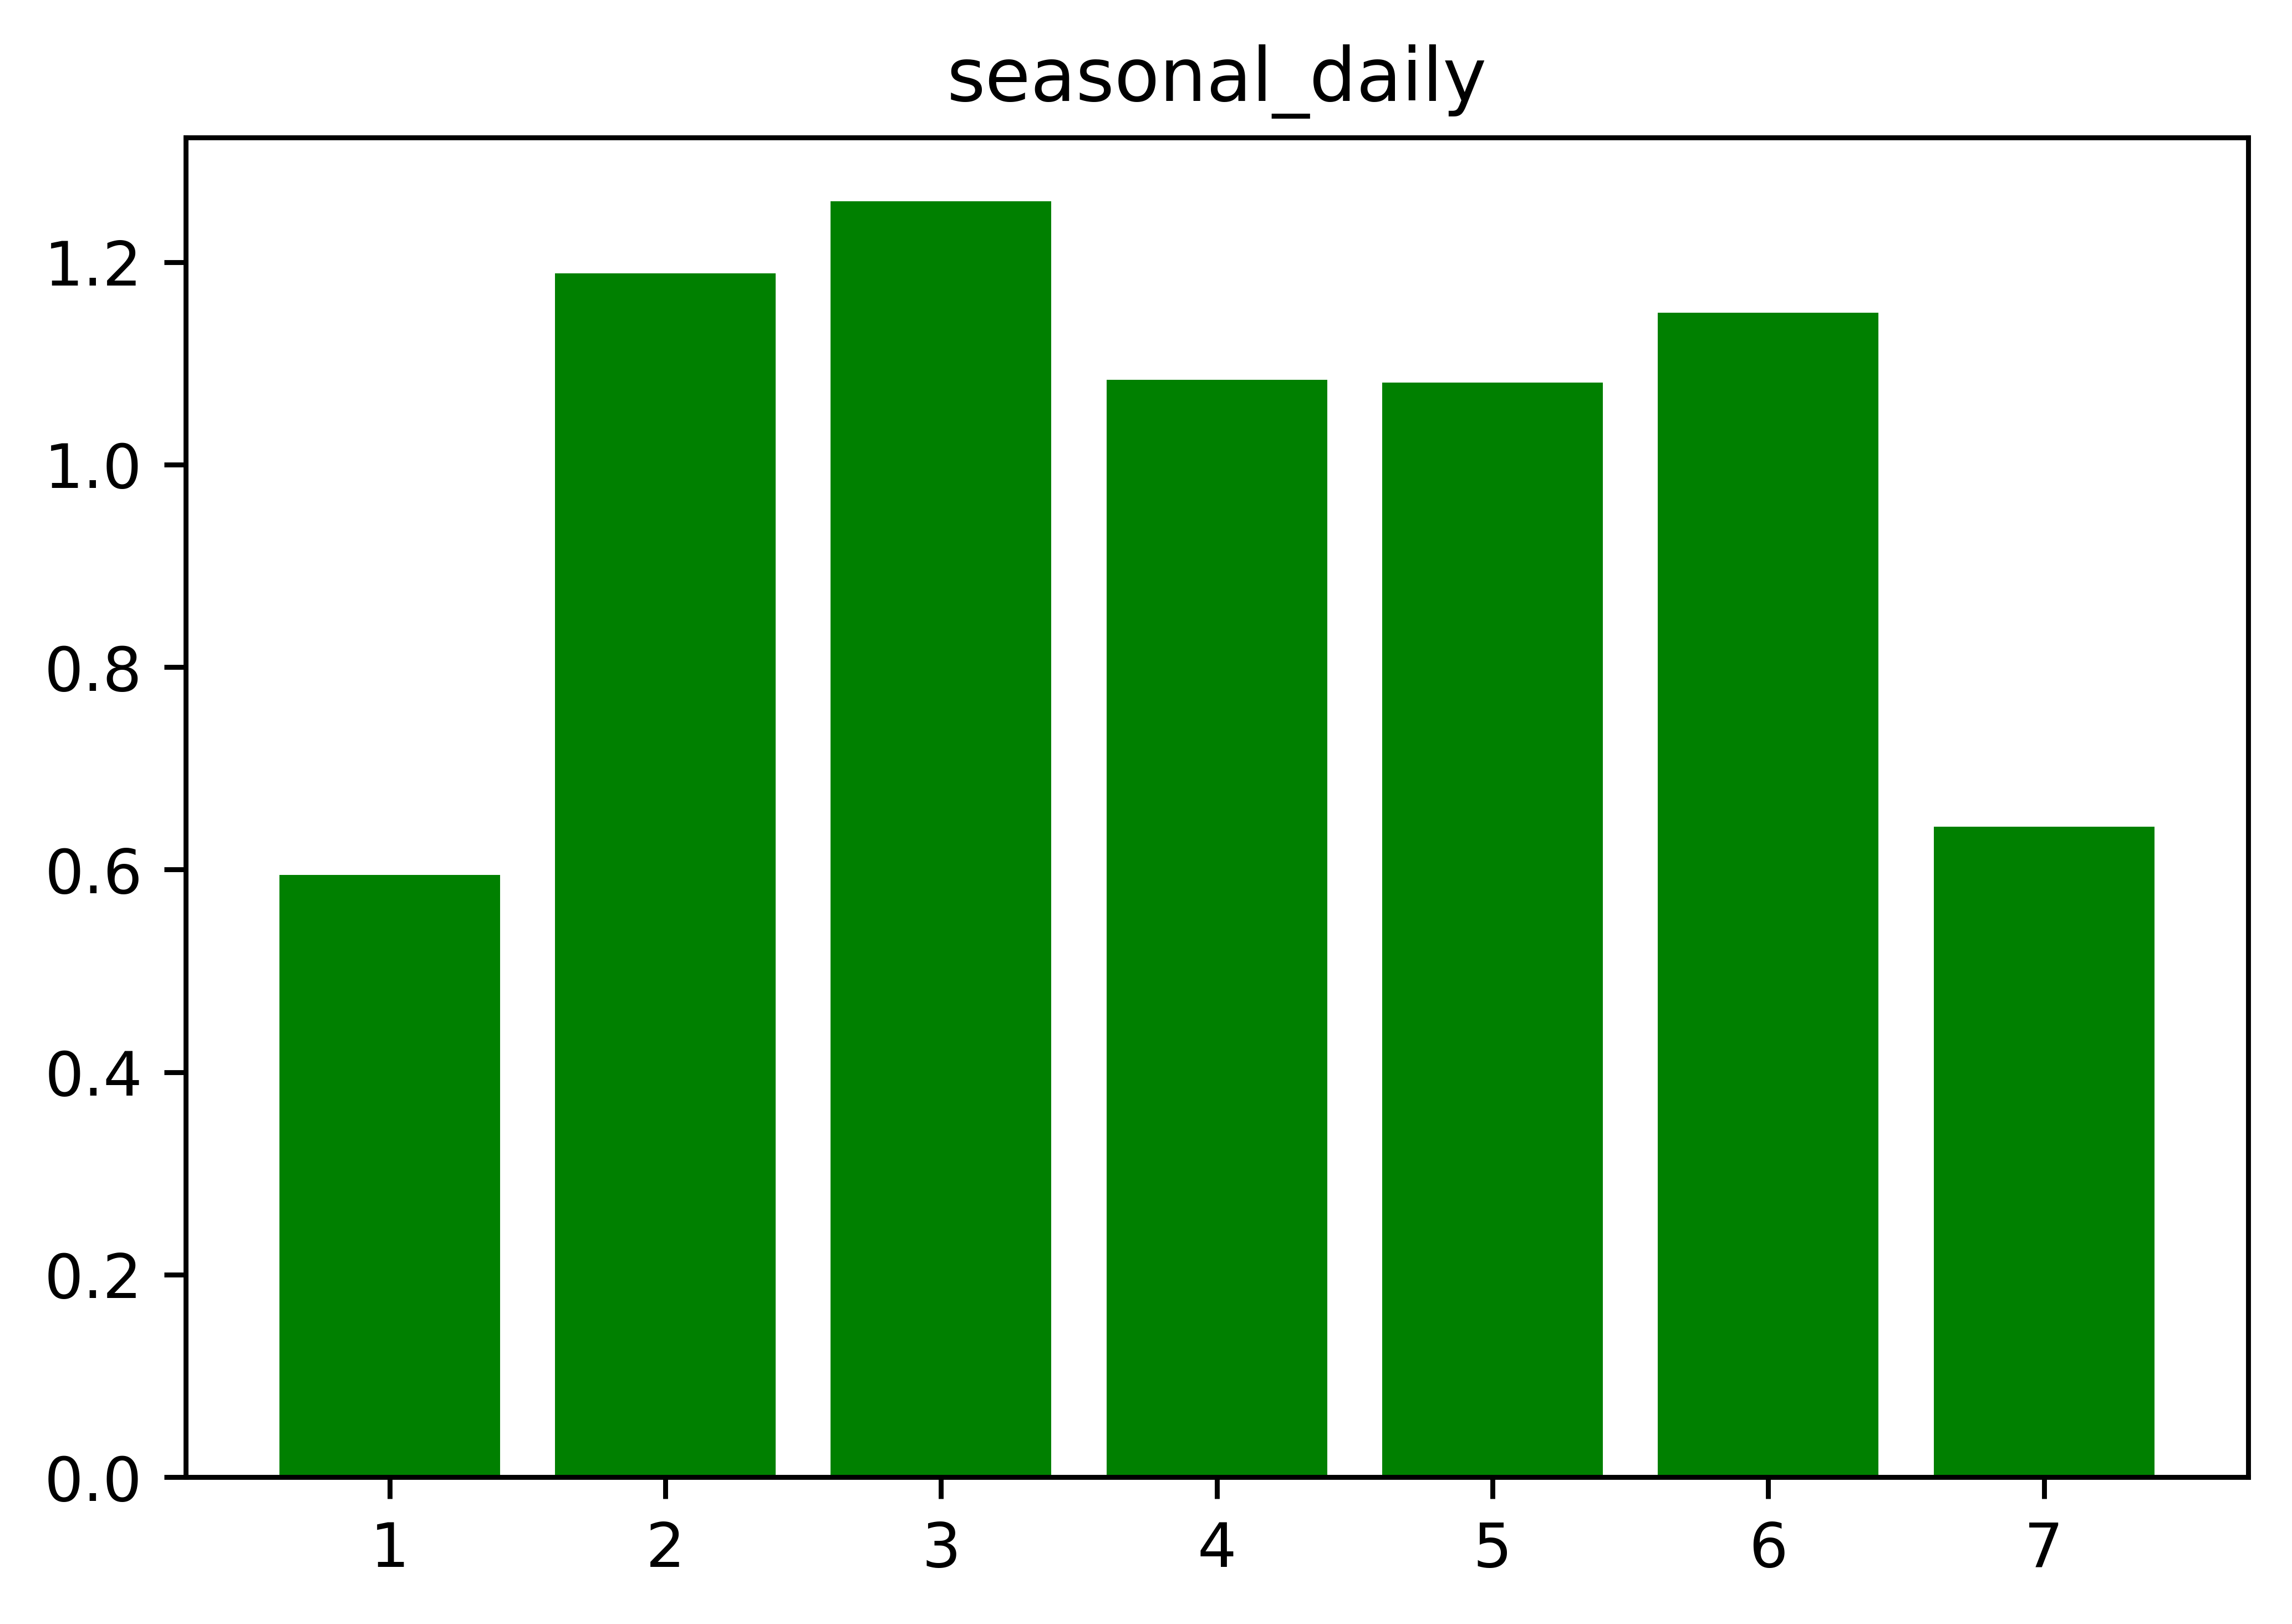

In [10]:
decompose_and_show_daily(s1)

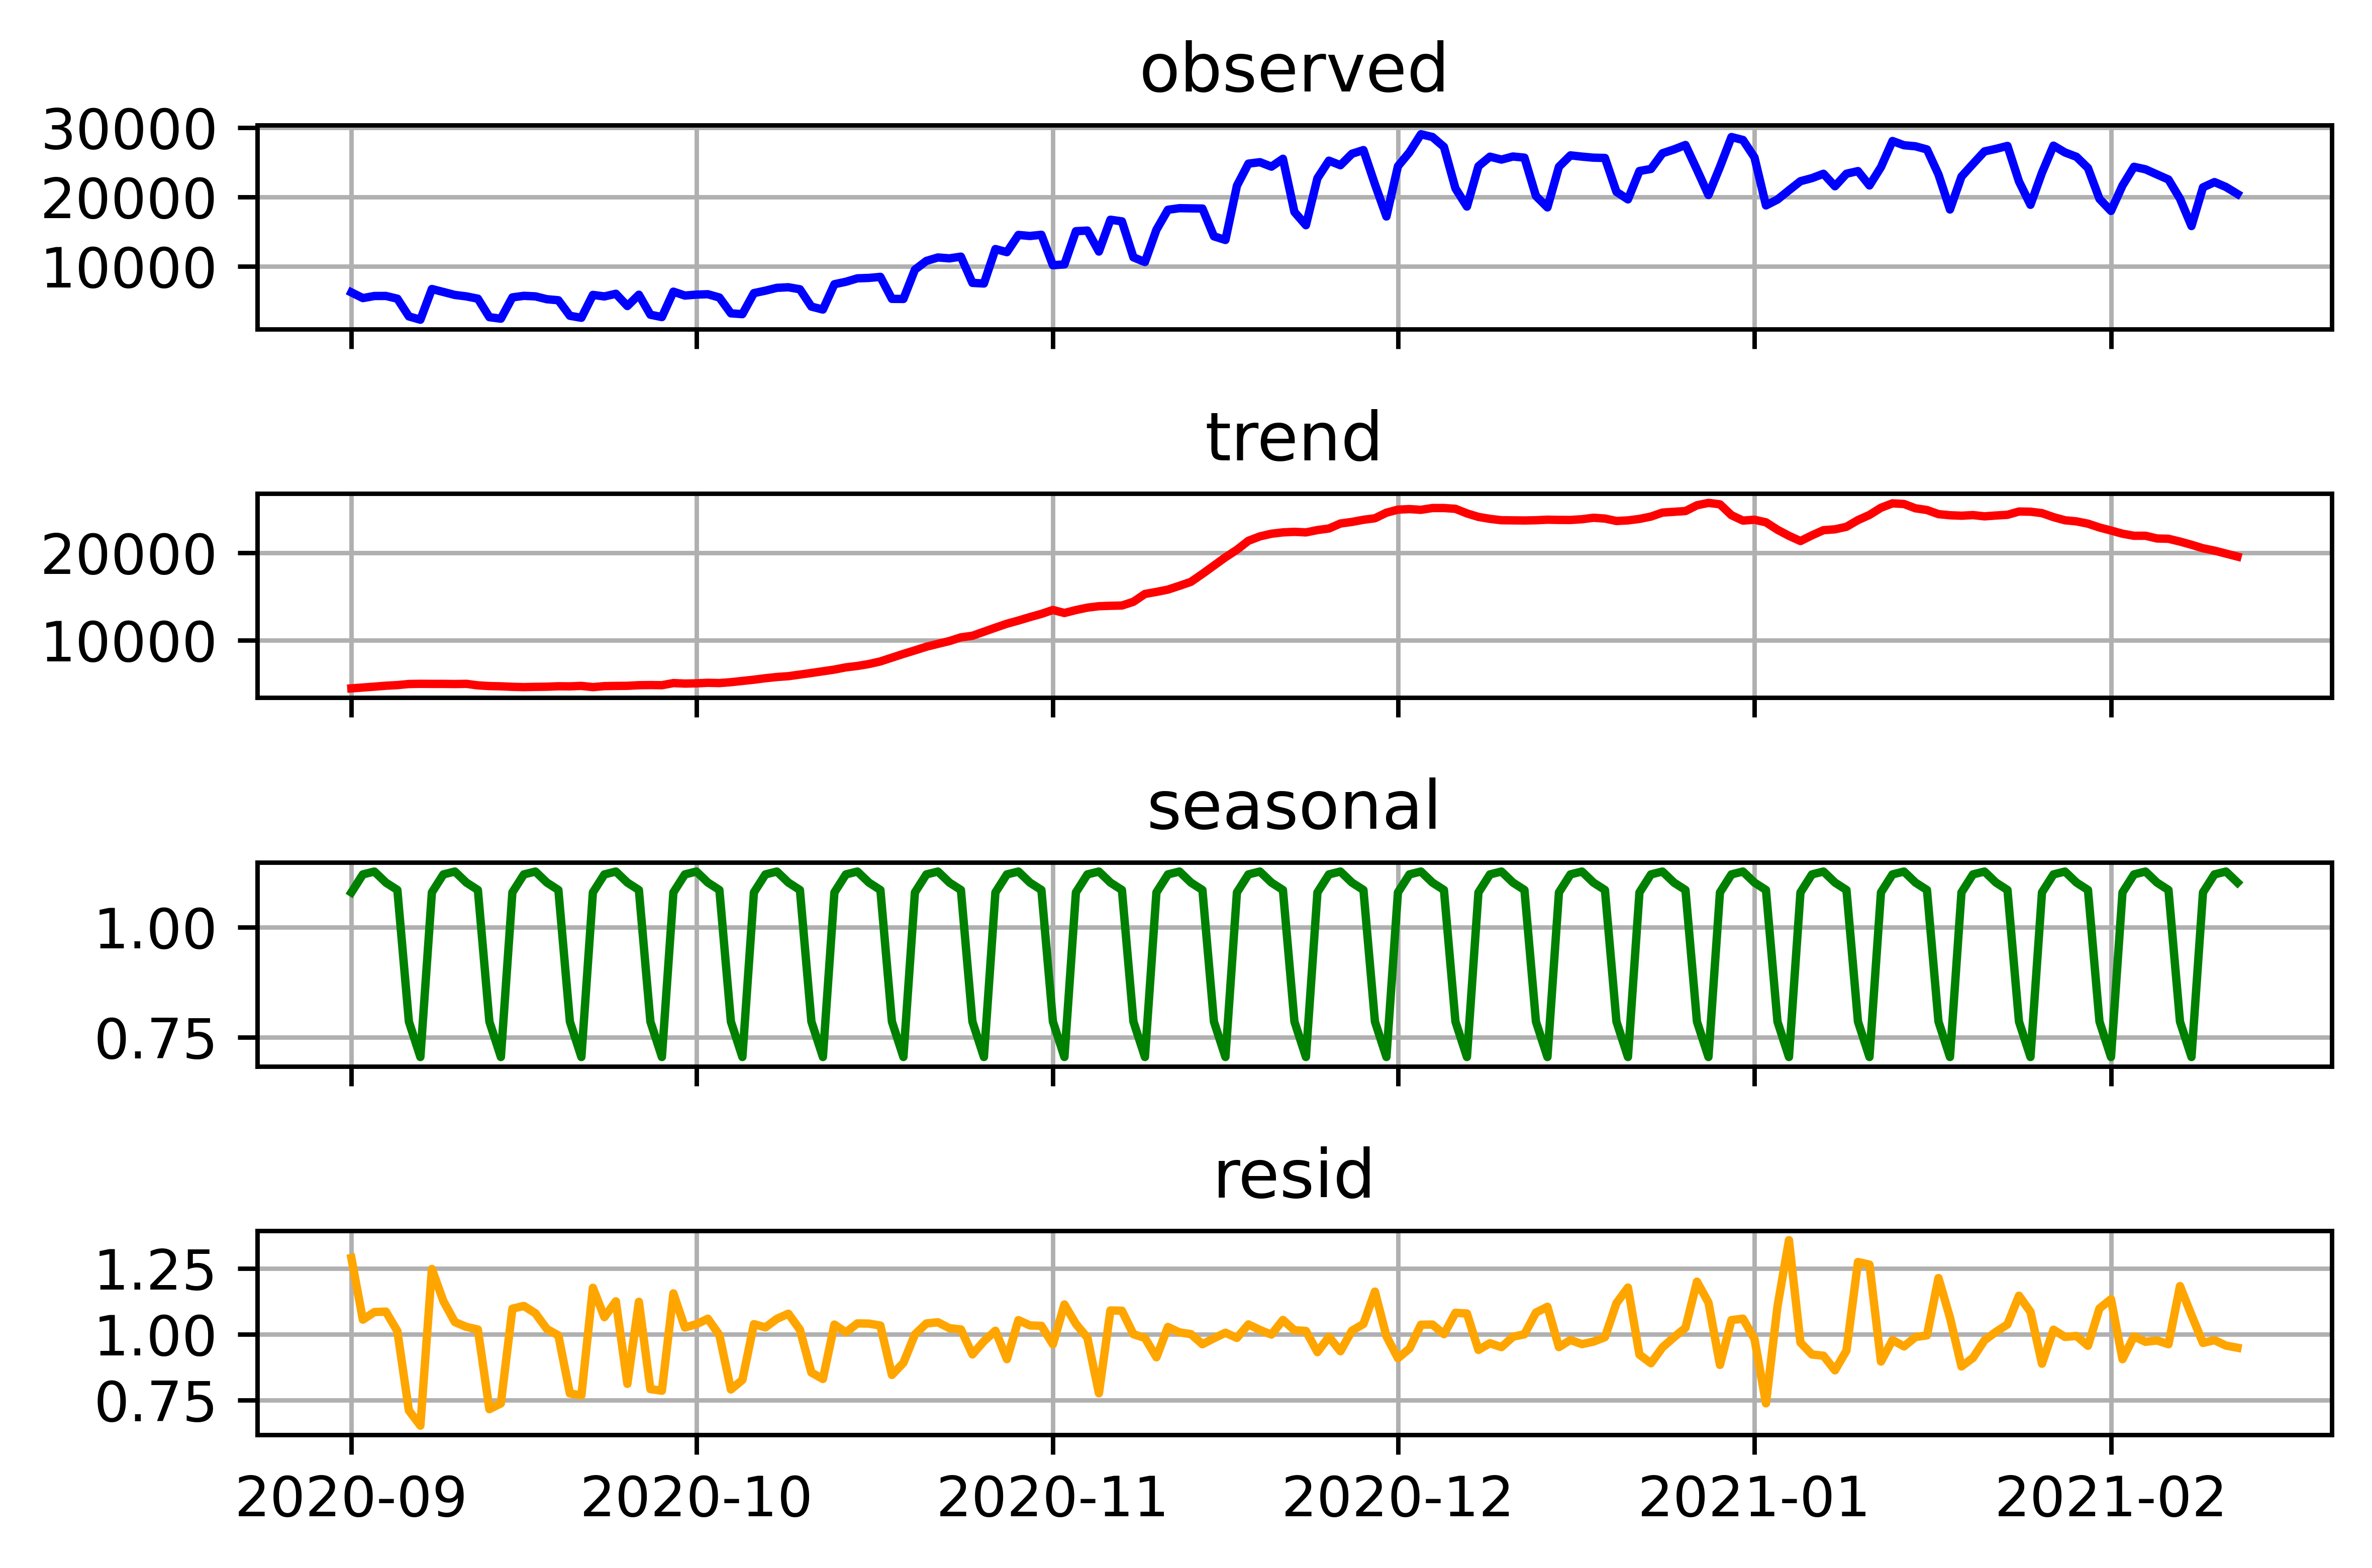

In [11]:
resid2 = decompose_and_show(s2)

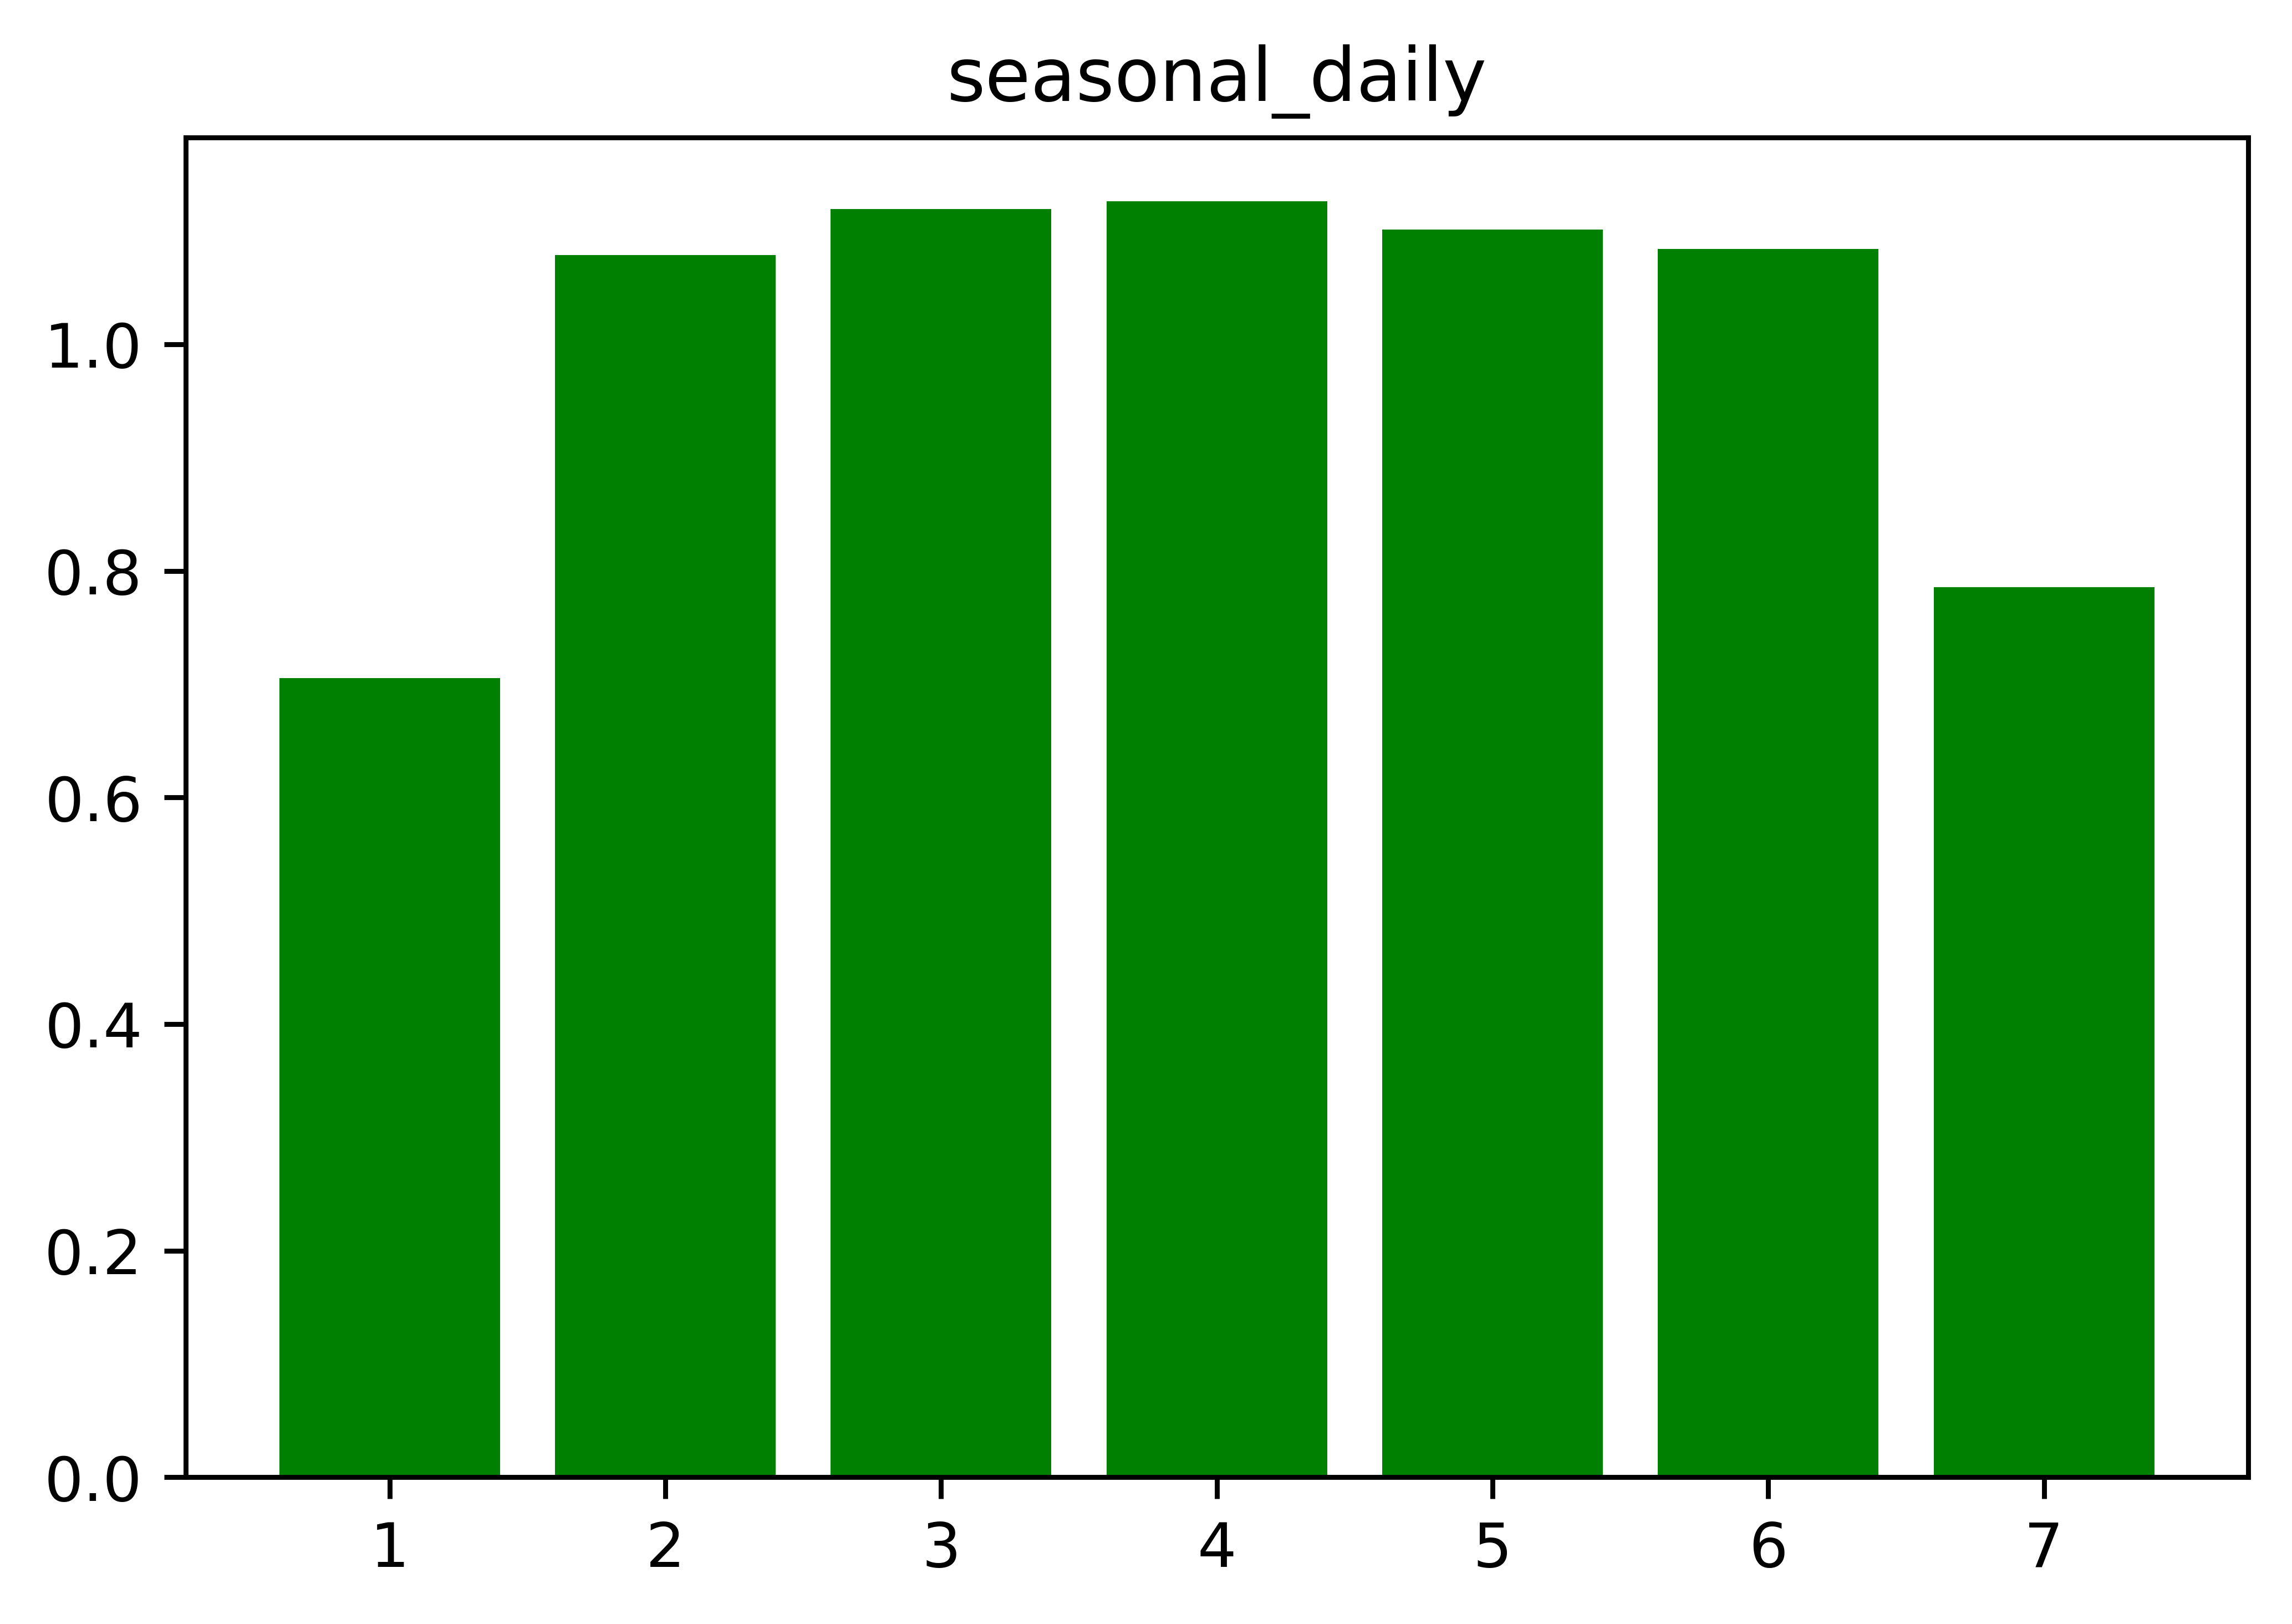

In [12]:
decompose_and_show_daily(s2)

в первую волну больше всего выздоровевших в среду, меньше всего в понедельник
во вторую волну больше всего выздоровевших в четверг, меньше всего в понедельник

In [13]:
print(f"1 Волна: p-value {adfuller(resid1)[1]}")
print(f"2 Волна: p-value {adfuller(resid2)[1]}")

1 Волна: p-value 1.5234581762449152e-13
2 Волна: p-value 0.4704766874734398


Для уровня значимости 5%
В первую волну остатки стационарные, во вторую - нет
